In [1]:
!pip install numpy
!pip install opencv-python
!pip install keras
!pip3 install --upgrade tensorflow
!pip install pillow

In [25]:
#Training a model

In [3]:

# import required packages
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        'data/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)
from keras.optimizers import legacy

emotion_model.compile(loss='categorical_crossentropy', optimizer=legacy.Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])

# Train the neural network/model

emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

# save model structure in jason file
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
emotion_model.save_weights('emotion_model.h5')



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


C:\Users\Imtiyaz\anaconda3\lib\site-packages\keras\src\optimizers\legacy\adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\Imtiyaz\AppData\Local\Temp\ipykernel_17176\3555399195.py:54: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


Epoch 1/50
448/448 [==============================] - 495s 1s/step - loss: 1.8085 - accuracy: 0.2547 - val_loss: 1.7381 - val_accuracy: 0.3266
Epoch 2/50
448/448 [==============================] - 461s 1s/step - loss: 1.6494 - accuracy: 0.3554 - val_loss: 1.5824 - val_accuracy: 0.3979
Epoch 3/50
448/448 [==============================] - 507s 1s/step - loss: 1.5518 - accuracy: 0.4019 - val_loss: 1.4918 - val_accuracy: 0.4262
Epoch 4/50
448/448 [==============================] - 454s 1s/step - loss: 1.4817 - accuracy: 0.4325 - val_loss: 1.4207 - val_accuracy: 0.4609
Epoch 5/50
448/448 [==============================] - 221s 493ms/step - loss: 1.4182 - accuracy: 0.4598 - val_loss: 1.3700 - val_accuracy: 0.4767
Epoch 6/50
448/448 [==============================] - 219s 489ms/step - loss: 1.3663 - accuracy: 0.4807 - val_loss: 1.3281 - val_accuracy: 0.4965
Epoch 7/50
448/448 [==============================] - 216s 483ms/step - loss: 1.3201 - accuracy: 0.4948 - val_loss: 1.2924 - val_accurac

In [7]:
from keras.optimizers import legacy

emotion_model.compile(loss='categorical_crossentropy', optimizer=legacy.Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])


In [6]:
!pip install --upgrade opencv-python


In [1]:
pip install package_name --user


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for package_name: filename=package_name-0.1-py3-none-any.whl size=1234 sha256=c12657c06126dbd03cb25c106d2386006842948381c26bc9793801599a37ad7c
  Stored in directory: c:\users\imtiyaz\appdata\local\pip\cache\wheels\a3\36\c4\98d928f30290fb88555f848f73093f02b67c984a45c56c3e97
Successfully built package_name
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Select image
import cv2
import numpy as np
from keras.models import model_from_json
import tkinter as tk
from tkinter import filedialog

emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# Load JSON and create model
json_file = open('model/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# Load weights into the model
emotion_model.load_weights("model/emotion_model.h5")
print("Loaded model from disk")

# Open file dialog to select image
root = tk.Tk()
root.withdraw()
file_path = filedialog.askopenfilename()

# Read the selected image
image = cv2.imread(file_path)

# Convert image to grayscale
gray_frame = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
face_detector = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

# Process each face in the image
for (x, y, w, h) in num_faces:
    cv2.rectangle(image, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
    roi_gray_frame = gray_frame[y:y + h, x:x + w]
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

    # Predict the emotions
    emotion_prediction = emotion_model.predict(cropped_img)
    maxindex = int(np.argmax(emotion_prediction))
    cv2.putText(image, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

# Display the image with emotions detected
cv2.imshow('Emotion Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Loaded model from disk


In [3]:
#REAL Time
import cv2
import numpy as np
from keras.models import model_from_json

emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# Load JSON and create model
json_file = open('model/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# Load weights into the model
emotion_model.load_weights("model/emotion_model.h5")
print("Loaded model from disk")

# Start the webcam feed
cap = cv2.VideoCapture(0)

while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    frame = cv2.resize(frame, (1280, 720))
    if not ret:
        break
    face_detector = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces available on camera
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # Process each face available on the camera
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 255, 0), 4)  # Change color to red
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # Predict the emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2, cv2.LINE_AA)  # Change color to white

    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Loaded model from disk
1/1 [==============================] - 0s 31ms/step


In [4]:
#Capture 5 
import cv2
import numpy as np
import os
from keras.models import model_from_json

emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# Load JSON and create model
json_file = open('model/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# Load weights into the model
emotion_model.load_weights("model/emotion_model.h5")
print("Loaded model from disk")

# Start the webcam feed
cap = cv2.VideoCapture(0)

# Create a directory to save the captured images
os.makedirs("captures", exist_ok=True)

# Counter for captured images
image_counter = 0

while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    frame = cv2.resize(frame, (1280, 720))
    if not ret:
        break
    face_detector = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces available on camera
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # Process each face available on the camera
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 255, 0), 4)  # Change color to red
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # Predict the emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2, cv2.LINE_AA)  # Change color to white

        # Capture and save the image if 5 consecutive frames detect the same emotion
        if emotion_dict[maxindex] == "Happy":
            image_counter += 1
            image_path = os.path.join("captures", f"capture_{image_counter}.jpg")
            cv2.imwrite(image_path, frame)

    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q') or image_counter >= 5:
        break

cap.release()
cv2.destroyAllWindows()


Loaded model from disk
1/1 [==============================] - 0s 29ms/step


Loaded model from disk
Found 7178 images belonging to 7 classes.


C:\Users\Imtiyaz\AppData\Local\Temp\ipykernel_17908\1155515465.py:33: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = emotion_model.predict_generator(test_generator)


-----------------------------------------------------------------
[[108  12 124 243 181 189 101]
 [ 18   0   7  32  20  23  11]
 [124  14 135 277 148 189 137]
 [164  20 215 460 337 383 195]
 [120  10 175 341 224 216 147]
 [158  22 166 315 223 230 133]
 [ 95   8  93 224 149 151 111]]


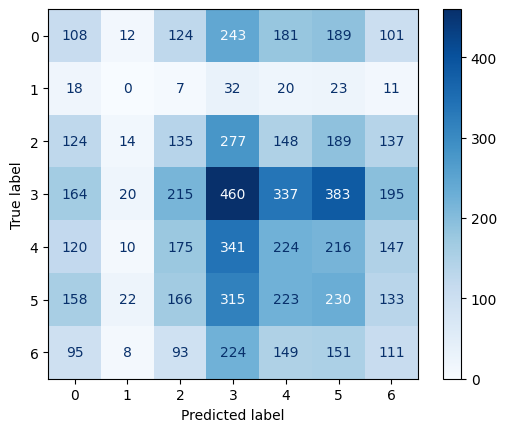

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.14      0.11      0.12       958
           1       0.00      0.00      0.00       111
           2       0.15      0.13      0.14      1024
           3       0.24      0.26      0.25      1774
           4       0.17      0.18      0.18      1233
           5       0.17      0.18      0.18      1247
           6       0.13      0.13      0.13       831

    accuracy                           0.18      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.18      0.17      7178



In [1]:
#Evalution 
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay


emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# load json and create model
json_file = open('model/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("model/emotion_model.h5")
print("Loaded model from disk")

# Initialize image data generator with rescaling
test_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# do prediction on test data
predictions = emotion_model.predict_generator(test_generator)

# see predictions
# for result in predictions:
#     max_index = int(np.argmax(result))
#     print(emotion_dict[max_index])

print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(test_generator.classes, predictions.argmax(axis=1)))




